In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [8]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)[:, 1]

In [26]:
# calculate score
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize score
print('Logistic: ROC AUC=%.10f' % (lr_auc))
# calculate roc curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

Logistic: ROC AUC=0.9028205128


In [5]:
def perf_measure(y_actual, probs, thr):
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(len(y_actual)):
        if y_actual[i] == 1 and probs[i] > thr:
            tp += 1
        elif y_actual[i] == 0 and probs[i] < thr:
            tn +=1            
        elif y_actual[i] == 1 and probs[i] < thr:
            fn += 1            
        else: 
            fp += 1            
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    return fpr, tpr

In [18]:
def RocCurve(y_test, lrprobs):
    fpr = []
    tpr = []
    for thr in np.linspace(0, 1, 122, endpoint=True):
        fpr.append(perf_measure(y_test, lrprobs, thr)[0])
        tpr.append(perf_measure(y_test, lrprobs, thr)[1])
    return np.array(fpr), np.array(tpr)

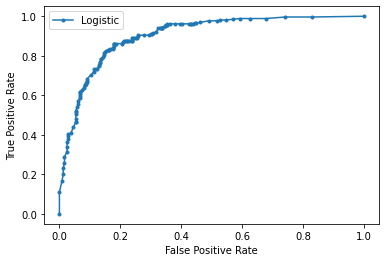

In [19]:
#plot ROC curve using fpr and tpr calculated by me
pyplot.plot(RocCurve(y_test, lr_probs)[0], RocCurve(y_test, lr_probs)[1], marker = '.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

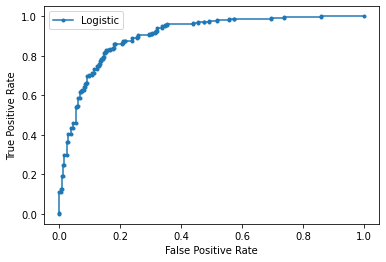

In [20]:
# plot the roc curve using builtin fpr and tpr
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [21]:
def auc_score(y_test, lr_probs):
    fpr, tpr = RocCurve(y_test, lr_probs)
    return (fpr[:-1]-fpr[1:])@((tpr[:-1]+tpr[1:])/2)

In [22]:
auc_score(y_test, lr_probs)

0.9025320512820513